# Predicting Breast Cancer
***
**Author:** Aziza Gulyamova

## Overview


Ability to prevent and determine the cancerous cells forehead has been major concern in healthcare industry. The main approach to prevent cancer is to be able to predict if a patient has malignant or benign cells, and be ready to take action.

My goal for this project is to build a classification model that will be able to analyze the mass in a breast of a woman to identify it as malignant or benign. Being able to design a model that can accurately predict what kind of cell is mass made of will allow the healthcare professionals to effectively act against it. If they know that mass is malignant, they can plan appropriately as to what measures should be taken to treat those patients. 


***

## Data

The Breast Cancer Data for this project was obtained from Sklearn Datasets. The dataset has information about 569 masses observed in breasts of patients. The features represent the mean values for radius, texture and etc, in addition with worst parts of the mass. 

**Link to Dataset:** https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

***

# Data Cleaning

Before proceeding to any analysis and modeling, I will need to upload necessary packages and upload dataset. After that, the data needs to be explored and cleaned from unnecessary columns and observations.

## Import Packages

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Transformers
from sklearn.preprocessing import StandardScaler

# Modeling Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, plot_confusion_matrix

# Data
from sklearn.datasets import load_breast_cancer


In [2]:
# set notebook style parameters
plt.style.use('seaborn')
sns.set_theme('talk')

## Upload Dataset

In [3]:
data = load_breast_cancer() # load dataset from sklearn
df = pd.DataFrame(data['data'], columns = data['feature_names']) # convert dataset to dataframe
df['target'] = data['target'] # attach target feature

df.head() #print first 5 rows of data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

* The dataset has 30 features and target variable that represents type of mass: malignant or benign

## Explore Dataset

First, I will see if the data has any significant imbalance that needs to be addressed:

In [5]:
df.target.value_counts() 

1    357
0    212
Name: target, dtype: int64

* The data is slightly imbalanced, but does not need to be upsampled/downsampled

Now, I will check if there are any missing values:

In [6]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

* There are no missing values, so I won't drop any observations or features.

### Descriptive Analysis

Descriptive analysis shows statistical summary for numerical features.

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


* The average radius of masses is 14.13 mm 
* The average perimeter of masses is 91.97 mm 
* The average worst radius of masses is 16.27 mm 
* The average worst perimeter of masses is 107.26 mm 

## Visual Exploration

Build a histograms for all numerical features to see the distribution of values

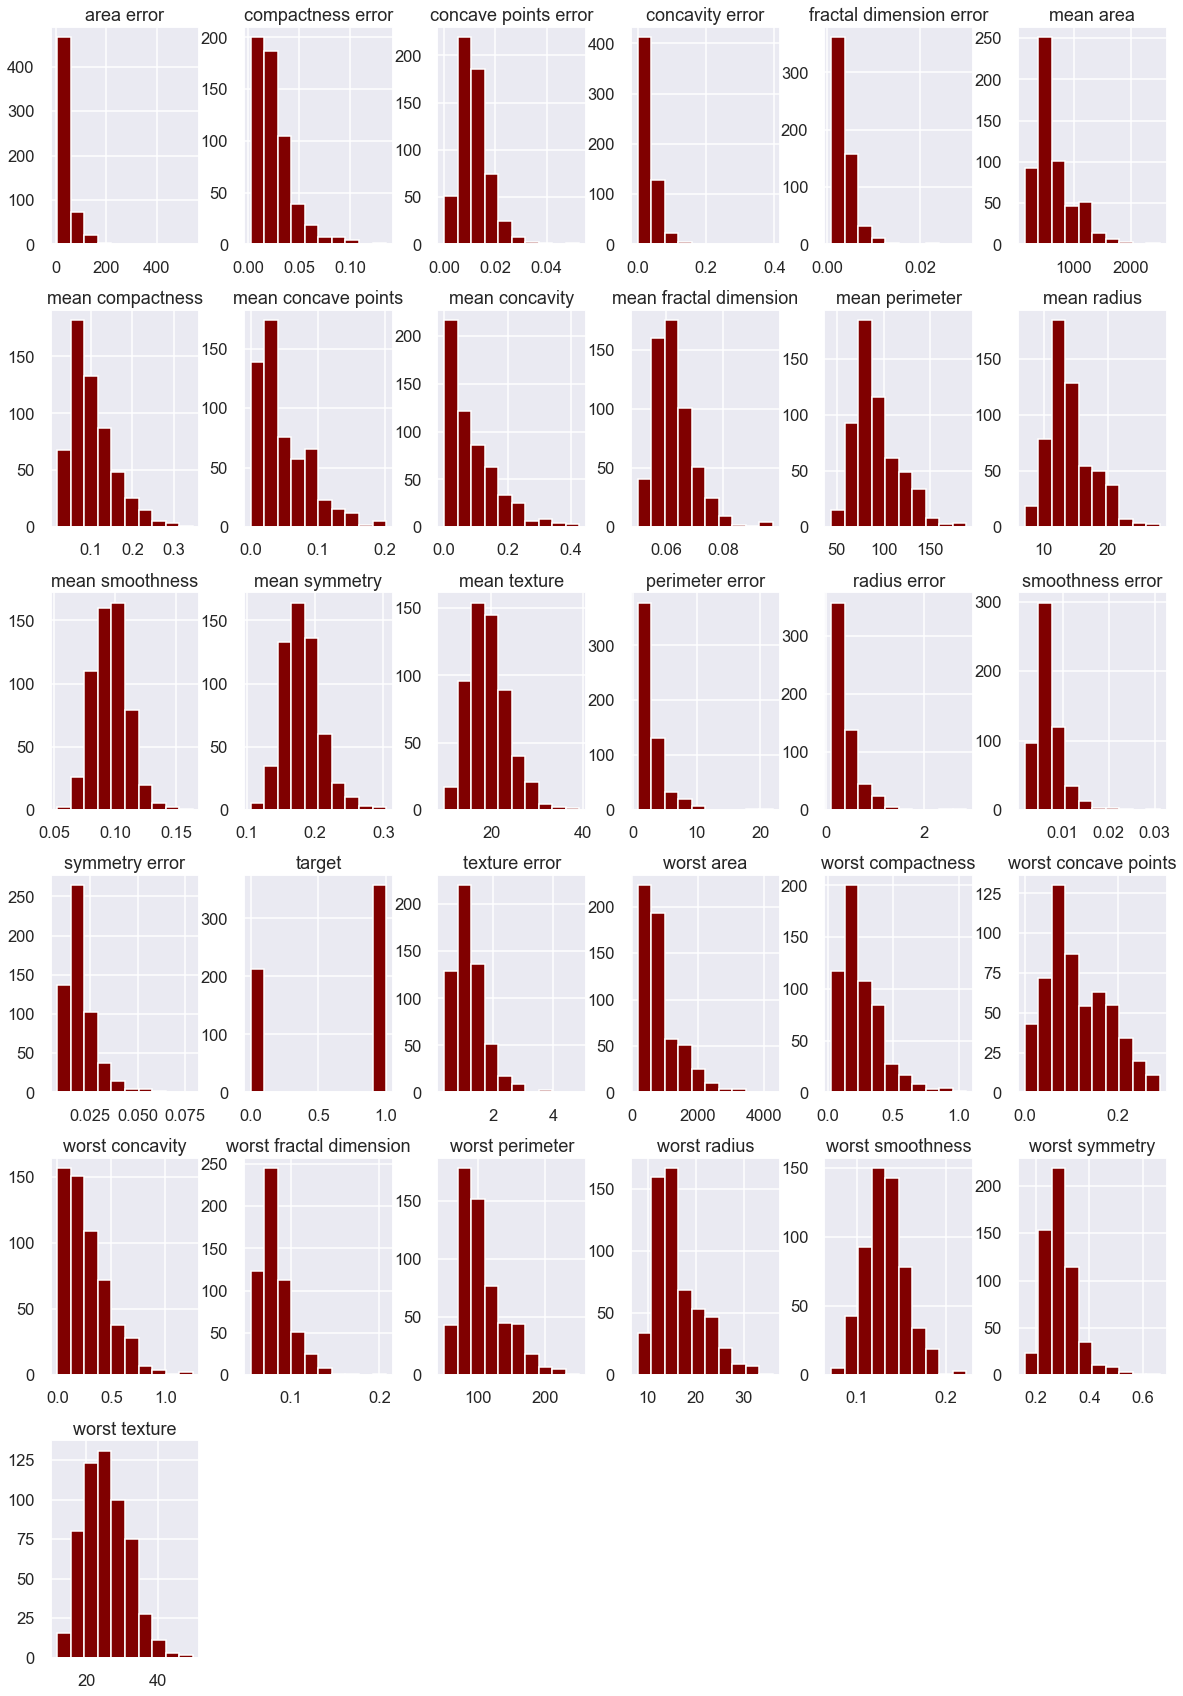

In [36]:
ax = df.hist(figsize = (20,30), edgecolor="w", facecolor='maroon')

* Most of the mean and worst features are seem to be normally distributed with slight skewness. 

### Train Test Split

In order to evaluate models performance, I will split the data into three parts: train, test and validation. Also, I will separate the target variable from features that will be fed to model.

In [9]:
# Predictive Features
features = df.drop('target', axis = 1)
# Target Variable
target = df.target

# Create three sets of data. 
# One for training a model
# One for validating a model
# One for predicting on unseen data
x_all, x_hold, y_all, y_hold = train_test_split(features, target, random_state=2020)
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=2020) 

Now, I will scale data in order to prevent data misreading and mispredicting

In [10]:
# Fit a scaler to a training data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Baseline Model - Logistic Regression

The first model I will build is Logistic Regression with default parameters. Logistic Regression is a linear model for classification. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [11]:
model_1 = LogisticRegression().fit(x_train_scaled, y_train)

**Make Predictions for Train and Test Sets**

In [12]:
train_preds = model_1.predict(x_train_scaled)
test_preds = model_1.predict(x_test_scaled)

**Accuracy Scores for Train and Test Sets**

Since I am predicting the cancerous masses, having high amount of false negatives(true label - malignant, predicted - benign) would be the worst case, I will use recall metric to evaluate model performance.

In [13]:
print(f'Accuracy Score for Test Set: {accuracy_score(y_test, test_preds)}')
print(f'Accuracy Score for Train Set: {accuracy_score(y_train, train_preds)}')

print(f'Recall Score for Test Set: {recall_score(y_test, test_preds)}')
print(f'Recall Score for Train Set: {recall_score(y_train, train_preds)}')

Accuracy Score for Test Set: 0.9790209790209791
Accuracy Score for Train Set: 0.9882629107981221
Recall Score for Test Set: 0.975609756097561
Recall Score for Train Set: 0.9963636363636363


**Confusion Matrix**

A confusion matrix is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known.

<Figure size 720x720 with 0 Axes>

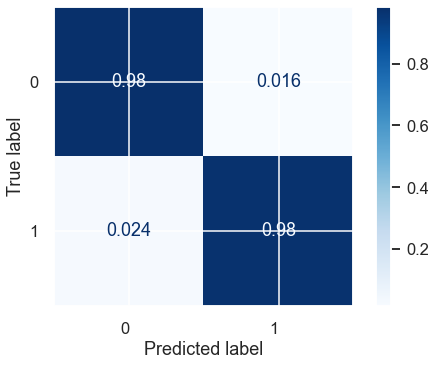

In [14]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model_1, x_test_scaled, y_test,
                     cmap=plt.cm.Blues,normalize='true')

plt.xticks(horizontalalignment='right')
plt.show()

In [15]:
residuals = y_train == train_preds

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     421
False      5
Name: target, dtype: int64


In [16]:
residuals = y_test == test_preds

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     140
False      3
Name: target, dtype: int64


### Model Results:

* Accuracy and Recall Scores are high and there is no overfitting, since the scores for training and testing sets are close enough to each other.
* Confusion Matrix shows that model predicts 98% of target value correctly for both of the categories.
* Resudials show that only 3 values were predicted incorrectly out of 143.
* Overall model showed great performance.

## Decision Tree Model

Second model I will build is Decision Tree Classifier, which is non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [17]:
model_2 = DecisionTreeClassifier(random_state = 2021, max_depth = 10).fit(x_train_scaled, y_train)

**Make Predictions for Train and Test Sets**

In [18]:
train_preds = model_2.predict(x_train_scaled)
test_preds = model_2.predict(x_test_scaled)

**Accuracy and Recall Scores for Train and Test Sets**

In [19]:
print(f'Accuracy Score for Test Set: {accuracy_score(y_test, test_preds)}')
print(f'Accuracy Score for Train Set: {accuracy_score(y_train, train_preds)}')

print(f'Recall Score for Test Set: {recall_score(y_test, test_preds)}')
print(f'Recall Score for Train Set: {recall_score(y_train, train_preds)}')

Accuracy Score for Test Set: 0.9300699300699301
Accuracy Score for Train Set: 1.0
Recall Score for Test Set: 0.9512195121951219
Recall Score for Train Set: 1.0


**Confusion Matrix**

<Figure size 720x720 with 0 Axes>

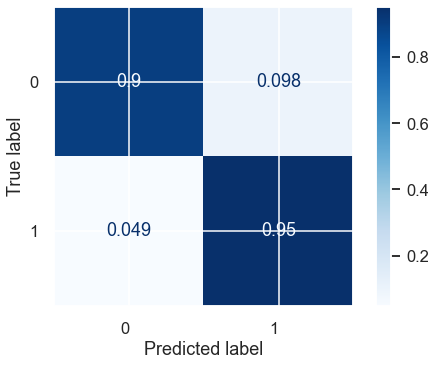

In [20]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model_2, x_test_scaled, y_test,
                     cmap=plt.cm.Blues,normalize='true')

plt.xticks(horizontalalignment='right')
plt.show()

**Residuals**

In [21]:
residuals = y_train == train_preds

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True    426
Name: target, dtype: int64


In [22]:
residuals = y_test == test_preds

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     133
False     10
Name: target, dtype: int64


### Model Results:

* Accuracy and Recall Scores are high and there is **slight overfitting**, since the score for training set is 1.0.
* Confusion Matrix shows that model predicts 90% of target value correctly for both of the categories.
* Resudials show that only 10 values were predicted incorrectly out of 143.
* Overall model showed good performance, but worse than Logistic Regression

## K-Nearest Neighbors

Last Model I will build is KNN, the principle behind which is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning).

In [23]:
model_3 = KNeighborsClassifier(n_neighbors=2).fit(x_train_scaled, y_train)

**Make Predictions for Train and Test Sets**

In [24]:
train_preds = model_3.predict(x_train_scaled)
test_preds = model_3.predict(x_test_scaled)

**Accuracy Scores for Train and Test Sets**

In [25]:
print(f'Accuracy Score for Test Set: {accuracy_score(y_test, test_preds)}')
print(f'Accuracy Score for Train Set: {accuracy_score(y_train, train_preds)}')

print(f'Recall Score for Test Set: {recall_score(y_test, test_preds)}')
print(f'Recall Score for Train Set: {recall_score(y_train, train_preds)}')

Accuracy Score for Test Set: 0.9440559440559441
Accuracy Score for Train Set: 0.9859154929577465
Recall Score for Test Set: 0.9512195121951219
Recall Score for Train Set: 0.9781818181818182


**Confusion Matrix**

<Figure size 720x720 with 0 Axes>

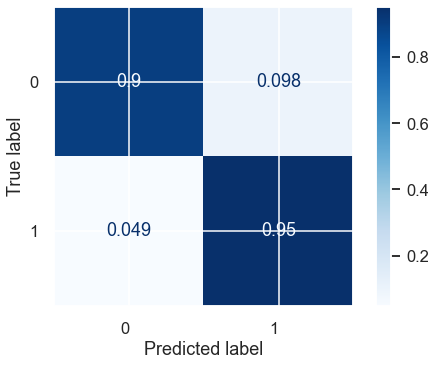

In [26]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model_2, x_test_scaled, y_test,
                     cmap=plt.cm.Blues,normalize='true')

plt.xticks(horizontalalignment='right')
plt.show()

**Residuals**

In [27]:
residuals = y_train == train_preds

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     420
False      6
Name: target, dtype: int64


In [28]:
residuals = y_test == test_preds

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     135
False      8
Name: target, dtype: int64


### Model Results:

* Accuracy Score is high and there is **less overfitting** than with Decision Tree, since the score for training set is less than 1.0.
* Confusion Matrix shows that model predicts 90% of target value correctly for both of the categories.
* Resudials show that only 8 values were predicted incorrectly out of 143.
* Overall model showed better performance than Decision Tree, but worse than Logistic Regression.

## Modeling Results:

Overall all models performed good. The accuracy scores are high and the overfitting is not drastic. 

The best results were achieved with Logistic regression Model:
* The accuracy and recall scores are high and the is no overfitting
* Lowest values for Type 2 Error - False Negative
* Only 3 values were predicted incorrectly 

Next, the KNN Model:

* Lower acuracy and recall scores than with Logistic Regression
* Higher values of False Negative 
* 8 out of 143 predicted incorrectly

Last, the Decision Tree Classifier:
* High accuracy and recall scores for training sets, but lower for test sets - overfitting
* Higher values for False Negative
* 10 values predicted incorrectly out of 143

## Model on Hold Out Dataset 

In [29]:
#scale holdout data
x_hold_scaled = scaler.transform(x_hold)

In [30]:
train_preds = model_1.predict(x_train_scaled)
test_preds = model_1.predict(x_hold_scaled)

**Accuracy Scores for Train and Test Sets**

In [31]:
print(f'Accuracy Score for Hold Out Set: {accuracy_score(y_hold, test_preds)}')
print(f'Accuracy Score for Train Set: {accuracy_score(y_train, train_preds)}')

print(f'Recall Score for Hold Out Set: {recall_score(y_hold, test_preds)}')
print(f'Recall Score for Train Set: {recall_score(y_train, train_preds)}')

Accuracy Score for Hold Out Set: 0.9790209790209791
Accuracy Score for Train Set: 0.9882629107981221
Recall Score for Hold Out Set: 0.975609756097561
Recall Score for Train Set: 0.9963636363636363


**Confusion Matrix**

<Figure size 720x720 with 0 Axes>

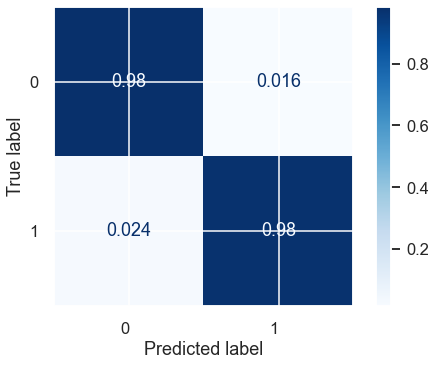

In [32]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(model_1, x_hold_scaled, y_hold,
                     cmap=plt.cm.Blues,normalize='true')

plt.xticks(horizontalalignment='right')
plt.show()

**Residuals**

In [33]:
residuals = y_train == train_preds

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     421
False      5
Name: target, dtype: int64


In [34]:
residuals = y_hold == test_preds

print('Number of values correctly predicted:')
print(pd.Series(residuals).value_counts())

Number of values correctly predicted:
True     140
False      3
Name: target, dtype: int64


### Model Results:

* Accuracy and Recall Scores are high and there is **no overfitting**
* Confusion Matrix shows that model predicts 98% of target value correctly for both of the categories.
* Resudials show that only 3 values were predicted incorrectly out of 143.
* Overall model showed best performance

# Experience

I've learned how to approach categorical data. What ae classification models and how to conduct full Machine Learning Project.

### Citations

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/neighbors.html